In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob 
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS
import networkx as nx

In [2]:
tweets=pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/sentiment_analysis/demonetization-tweets.csv",encoding = "ISO-8859-1")
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [3]:
tweets.shape

(14940, 16)

In [4]:
display(tweets.text.head(10))

0    RT @rssurjewala: Critical question: Was PayTM ...
1    RT @Hemant_80: Did you vote on #Demonetization...
2    RT @roshankar: Former FinSec, RBI Dy Governor,...
3    RT @ANI_news: Gurugram (Haryana): Post office ...
4    RT @satishacharya: Reddy Wedding! @mail_today ...
5    @DerekScissors1: Indias #demonetization: #Bla...
6    RT @gauravcsawant: Rs 40 lakh looted from a ba...
7    RT @Joydeep_911: Calling all Nationalists to j...
8    RT @sumitbhati2002: Many opposition leaders ar...
9    National reform now destroyed even the essence...
Name: text, dtype: object

In [5]:
print(tweets['retweetCount'])

0        331
1         66
2         12
3        338
4        120
        ... 
14935      4
14936      0
14937     30
14938      2
14939      2
Name: retweetCount, Length: 14940, dtype: int64


In [6]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dheeraj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dheeraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
def clean(x):
    #Remove Html  
    x=BeautifulSoup(x).get_text()
    
    #Remove Non-Letters
    x=re.sub('[^a-zA-Z]',' ',x)
    
    #Convert to lower_case and split
    x=x.lower().split()
    
    #Remove stopwords
    stop=set(stopwords.words('english'))
    words=[w for w in x if not w in stop]
    
    #join the words back into one string
    return(' '.join(words))


In [8]:
tweets['text']=tweets['text'].apply(lambda x:clean(x))

In [9]:
# tweets.head()
display(tweets.text.head(10))

0    rt rssurjewala critical question paytm informe...
1        rt hemant vote demonetization modi survey app
2    rt roshankar former finsec rbi dy governor cbd...
3    rt ani news gurugram haryana post office emplo...
4    rt satishacharya reddy wedding mail today cart...
5    derekscissors india demonetization blackmoney ...
6    rt gauravcsawant rs lakh looted bank kishtwar ...
7    rt joydeep calling nationalists join walk corr...
8    rt sumitbhati many opposition leaders narendra...
9    national reform destroyed even essence sagan i...
Name: text, dtype: object

In [10]:
words_in_tweet = [tweets.lower().split() for tweets in tweets.text]
words_in_tweet[0]

['rt',
 'rssurjewala',
 'critical',
 'question',
 'paytm',
 'informed',
 'demonetization',
 'edict',
 'pm',
 'clearly',
 'fishy',
 'requires',
 'full',
 'disclosure']

In [11]:
import itertools
import collections

In [12]:
# all_words_no_urls = list(itertools.chain(*words_in_tweet))

# # Create counter
# counts_no_urls = collections.Counter(all_words_no_urls)

# counts_no_urls.most_common(15)

In [13]:
# clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
#                              columns=['words', 'count'])

# clean_tweets_no_urls

In [14]:
# fig, ax = plt.subplots(figsize=(8, 8))

# # Plot horizontal bar graph
# clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
#                       y='count',
#                       ax=ax,
#                       color="green")

# ax.set_title("Common Words Found in Tweets (Including All Words)")

# plt.show()

In [15]:
# words_in_tweet[0]

In [16]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['into', 'y', 'shan', 'if', "she's", 'had', 'too', "don't", 'ma', 'at']

In [17]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [18]:
tweets_nsw

[['rt',
  'rssurjewala',
  'critical',
  'question',
  'paytm',
  'informed',
  'demonetization',
  'edict',
  'pm',
  'clearly',
  'fishy',
  'requires',
  'full',
  'disclosure'],
 ['rt', 'hemant', 'vote', 'demonetization', 'modi', 'survey', 'app'],
 ['rt',
  'roshankar',
  'former',
  'finsec',
  'rbi',
  'dy',
  'governor',
  'cbdt',
  'chair',
  'harvard',
  'professor',
  'lambaste',
  'demonetization',
  'aam',
  'aadmi',
  'listen',
  'th'],
 ['rt',
  'ani',
  'news',
  'gurugram',
  'haryana',
  'post',
  'office',
  'employees',
  'provide',
  'cash',
  'exchange',
  'patients',
  'hospitals',
  'demonetization',
  'https',
  'co',
  'ugmxup'],
 ['rt',
  'satishacharya',
  'reddy',
  'wedding',
  'mail',
  'today',
  'cartoon',
  'demonetization',
  'reddywedding',
  'https',
  'co',
  'u',
  'glnrq',
  'f'],
 ['derekscissors',
  'india',
  'demonetization',
  'blackmoney',
  'symptom',
  'disease',
  'https',
  'co',
  'hsl',
  'ihj',
  'qe',
  'via',
  'ambazaarmag'],
 ['rt

In [19]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('demonetization', 14571),
 ('rt', 11060),
 ('https', 6524),
 ('co', 5704),
 ('india', 3293),
 ('modi', 3106),
 ('pm', 2783),
 ('narendra', 1566),
 ('rich', 1513),
 ('find', 1422),
 ('dear', 1411),
 ('implement', 1400),
 ('evanspiegel', 1389),
 ('actually', 1374),
 ('urautelaforever', 1273)]

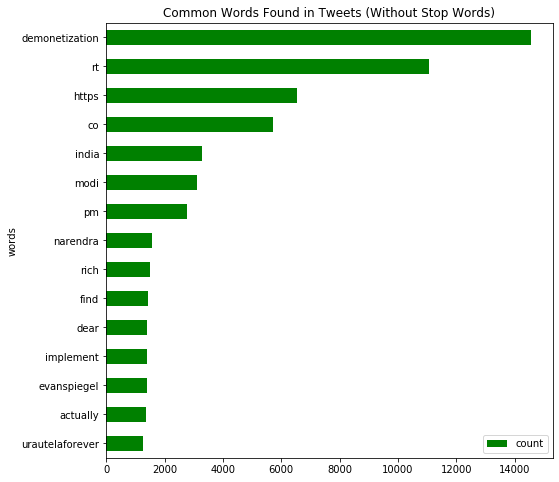

In [20]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [21]:
collection_words = ['rt', 'co', 'http', 'https', 'j', 'k']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [22]:
tweets_nsw_nc

[['rssurjewala',
  'critical',
  'question',
  'paytm',
  'informed',
  'demonetization',
  'edict',
  'pm',
  'clearly',
  'fishy',
  'requires',
  'full',
  'disclosure'],
 ['hemant', 'vote', 'demonetization', 'modi', 'survey', 'app'],
 ['roshankar',
  'former',
  'finsec',
  'rbi',
  'dy',
  'governor',
  'cbdt',
  'chair',
  'harvard',
  'professor',
  'lambaste',
  'demonetization',
  'aam',
  'aadmi',
  'listen',
  'th'],
 ['ani',
  'news',
  'gurugram',
  'haryana',
  'post',
  'office',
  'employees',
  'provide',
  'cash',
  'exchange',
  'patients',
  'hospitals',
  'demonetization',
  'ugmxup'],
 ['satishacharya',
  'reddy',
  'wedding',
  'mail',
  'today',
  'cartoon',
  'demonetization',
  'reddywedding',
  'u',
  'glnrq',
  'f'],
 ['derekscissors',
  'india',
  'demonetization',
  'blackmoney',
  'symptom',
  'disease',
  'hsl',
  'ihj',
  'qe',
  'via',
  'ambazaarmag'],
 ['gauravcsawant',
  'rs',
  'lakh',
  'looted',
  'bank',
  'kishtwar',
  'third',
  'incident',
  

In [23]:
from nltk import bigrams
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

In [24]:
terms_bigram

[[('rssurjewala', 'critical'),
  ('critical', 'question'),
  ('question', 'paytm'),
  ('paytm', 'informed'),
  ('informed', 'demonetization'),
  ('demonetization', 'edict'),
  ('edict', 'pm'),
  ('pm', 'clearly'),
  ('clearly', 'fishy'),
  ('fishy', 'requires'),
  ('requires', 'full'),
  ('full', 'disclosure')],
 [('hemant', 'vote'),
  ('vote', 'demonetization'),
  ('demonetization', 'modi'),
  ('modi', 'survey'),
  ('survey', 'app')],
 [('roshankar', 'former'),
  ('former', 'finsec'),
  ('finsec', 'rbi'),
  ('rbi', 'dy'),
  ('dy', 'governor'),
  ('governor', 'cbdt'),
  ('cbdt', 'chair'),
  ('chair', 'harvard'),
  ('harvard', 'professor'),
  ('professor', 'lambaste'),
  ('lambaste', 'demonetization'),
  ('demonetization', 'aam'),
  ('aam', 'aadmi'),
  ('aadmi', 'listen'),
  ('listen', 'th')],
 [('ani', 'news'),
  ('news', 'gurugram'),
  ('gurugram', 'haryana'),
  ('haryana', 'post'),
  ('post', 'office'),
  ('office', 'employees'),
  ('employees', 'provide'),
  ('provide', 'cash'),
  (

In [25]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('narendra', 'modi'), 1566),
 (('india', 'rich'), 1431),
 (('pm', 'narendra'), 1424),
 (('demonetization', 'find'), 1399),
 (('implement', 'demonetization'), 1398),
 (('rich', 'pm'), 1391),
 (('modi', 'implement'), 1376),
 (('evanspiegel', 'india'), 1371),
 (('dear', 'evanspiegel'), 1366),
 (('find', 'actually'), 1311),
 (('urautelaforever', 'dear'), 1273),
 (('narendramodi', 'demonetization'), 595),
 (('pm', 'narendramodi'), 590),
 (('since', 'demonetization'), 572),
 (('rs', 'lakh'), 551),
 (('demonetization', 'terrorists'), 550),
 (('lakh', 'looted'), 544),
 (('looted', 'bank'), 544),
 (('bank', 'kishtwar'), 542),
 (('kishtwar', 'third'), 542)]

In [26]:
#Top 20 most common bigrams
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(narendra, modi)",1566
1,"(india, rich)",1431
2,"(pm, narendra)",1424
3,"(demonetization, find)",1399
4,"(implement, demonetization)",1398
5,"(rich, pm)",1391
6,"(modi, implement)",1376
7,"(evanspiegel, india)",1371
8,"(dear, evanspiegel)",1366
9,"(find, actually)",1311


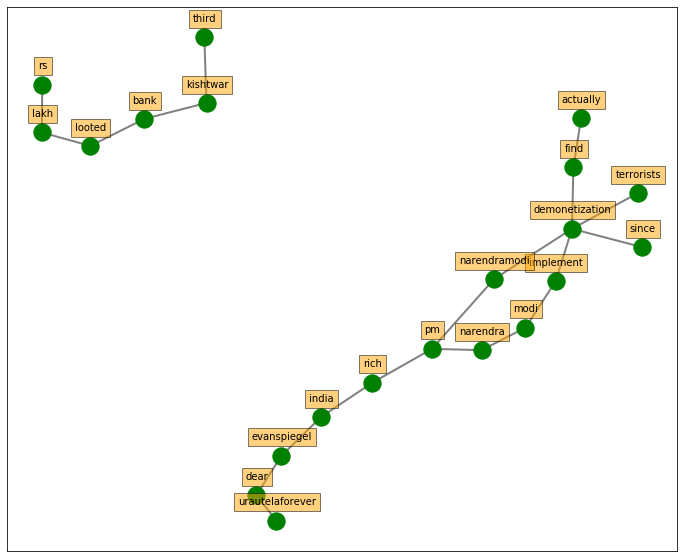

In [27]:
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 3))

fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=4)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=11,
                 fontweight='bold',
                 width=2,
                 edge_color='grey',
                 node_color='green',
#                  edge_length = 10,
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.00167, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='orange', alpha=0.5),
            horizontalalignment='center', fontsize=10)
    
plt.show()

In [28]:
TextBlob("not great").sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='Positive'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='Neutral'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='Negative'
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,rt rssurjewala critical question paytm informe...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.706,0.135,0.159,Positive
1,2,2,rt hemant vote demonetization modi survey app,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.000,0.000,Neutral
2,3,3,rt roshankar former finsec rbi dy governor cbd...,False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.000,0.000,Neutral
3,4,4,rt ani news gurugram haryana post office emplo...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.000,0.000,Neutral
4,5,5,rt satishacharya reddy wedding mail today cart...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,...,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.000,0.000,Neutral


In [30]:
tweets.sentiment_type.value_counts()

Positive    6771
Neutral     4233
Negative    3936
Name: sentiment_type, dtype: int64

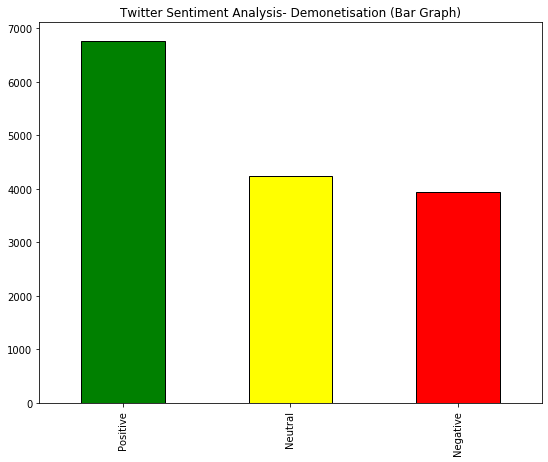

In [31]:
# fig = plt.figure()
# fig.savefig('Sentiment_bar_plot.pdf')
colors = ['green', 'yellow', 'red']
tweets.sentiment_type.value_counts().plot(kind='bar',figsize=(9, 7),edgecolor='k',title="Twitter Sentiment Analysis- Demonetisation (Bar Graph)", color=colors)
# plt.savefig('Sentiment_bar_plot.png', dpi=100)

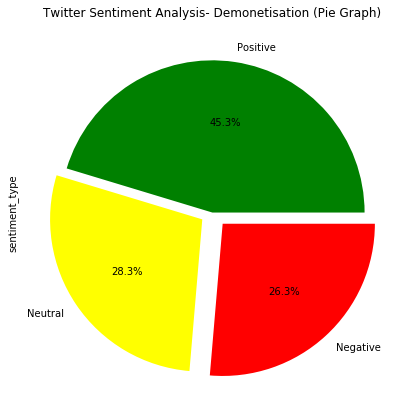

In [32]:
colors = ['green', 'yellow', 'red']
explode = (0, 0.08, 0.1)
tweets.sentiment_type.value_counts().plot(kind='pie', figsize=(9, 7), title="Twitter Sentiment Analysis- Demonetisation (Pie Graph)", colors=colors, explode=explode,autopct='%1.1f%%', shadow=False)
# plt.savefig('Sentiment_pie_plot.png', dpi=100)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer

tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets.text]       

vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
print(X.shape)

(14940, 1925)


In [34]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=50,init='k-means++',max_iter=200,n_init=1)

In [35]:
km.fit(X)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(50):
    print("cluster %d:" %i, end='')
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind], end='')
    print() 

cluster 0: suspect overwhelming elec political far positive economic bypolls going impact
cluster 1: implement evanspiegel dear rich urautelaforever actually narendra pm modi india
cluster 2: kishtwar gauravcsawant incident looted terrorists lakh rs bank https gau
cluster 3: oswal motilal services article education overall https impact india financial
cluster 4: impact mandis ujjwala coated neem urea historically dhan unprecedent jan
cluster 5: app hemant vote survey modi mounting misery indifferent totally proves
cluster 6: support huge voter su people nation modibharosa pm narendramodi rmg
cluster 7: corruptionfreeindia walk nationalists spread joydeep mas calling benefits join https
cluster 8: oscar obqrhlnsl drkumarvishwas goes mr https kumar retweeted dr hazare
cluster 9: youtube https video liked truth censorship google boycott adsense censoring
cluster 10: address shashitharoor demonstrating solidarity joined demanding mps parliame line duty
cluster 11: glvmi munaf ages patel se

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pos = pca.fit_transform(dist)
xs, ys = pos[:,0], pos[:,1]

In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}#, 5: '#8A2BE2', 6: '#E9967A'}
#8A2BE2
##E9967A
#set up cluster names using a dict
cluster_names = {0: 'cluster 1', 
                 1: 'cluster 2', 
                 2: 'cluster 3', 
                 3: 'cluster 4', 
                 4: 'cluster 5'}
                 #5: 'cluster 6',
                 #6: 'cluster 7'}
clusters = km.labels_.tolist()


In [ ]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title='')) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(10, 4)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point
plt.title('Cluster plotting with ACP', bbox={'facecolor':'0.8', 'pad':0})
#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=5)  

    
    
plt.show()

In [50]:
def maybe_fit_tsne(file=None):
    if file is None:
        file = "/home/dheeraj/my_projects/my_project_env/practice/sentiment_analysis/bio_matrix_2d.npy"
    try:
        bio_matrix_2d = np.load(file)
        logging.warning("loading cached TSNE file")
    except FileNotFoundError:
        logging.warning("Fitting TSNE")
        tsne = TSNE(n_components=2,
                    n_jobs=-1,
                    random_state=seed)
        bio_matrix_2d = tsne.fit_transform(bio_matrix.todense())

        np.save(file, bio_matrix_2d)
    return bio_matrix_2d

In [51]:
tsne_file = "/home/dheeraj/my_projects/my_project_env/practice/sentiment_analysis/bio_matrix_2d.npy"

In [52]:
import os
%%time
bio_matrix_2d = maybe_fit_tsne(tsne_file)


UsageError: Line magic function `%%time` not found.


In [ ]:
# def get_plottable_df(users, bios, two_d_coords, labels):
#     """
#     Combine the necessary pieces of data to create a data structure that plays
#     nicely with the our 2d tsne chart.

#     Note: assumes that all argument data series
#     are in the same order e.g. the first user, bio, coords, and label
#     all correspond to the same user.
#     """
#     # set up color palette
#     num_labels = len(set(labels))
#     colors = sns.color_palette('hls', num_labels).as_hex()
#     color_lookup = {v:k for k,v in zip(colors, set(labels))}
#     # combine data into a single df
#     df = pd.DataFrame({'uid': users,
#                        'text': bios,
                       
#                        'x_val': two_d_coords[:,0],
#                        'y_val': two_d_coords[:,1],
#                       })
#     # convert labels to colors
#     df['color'] = list(map(lambda x: color_lookup[x], labels))
#     return df

In [ ]:
# def plot_tsne(df, title='t-SNE plot'):
#     # add our DataFrame as a ColumnDataSource for Bokeh
#     plot_data = ColumnDataSource(df)
#     # configure the chart
#     tsne_plot = figure(title=title, plot_width=800, plot_height=700, tools=('pan, box_zoom, reset'))
#     # add a hover tool to display words on roll-over
#     tsne_plot.add_tools(
#         HoverTool(tooltips = """<div style="width: 400px;">(@label) @text</div>""")
#     )
#     # draw the words as circles on the plot
#     tsne_plot.circle('x_val', 'y_val',
#                      source=plot_data,
#                      color='color',
#                      line_alpha=0.2,
#                      fill_alpha=0.1,
#                      size=7,
#                      hover_line_color='black')
#     # configure visual elements of the plot
#     tsne_plot.title.text_font_size = '12pt'
#     tsne_plot.xaxis.visible = False
#     tsne_plot.yaxis.visible = False
#     tsne_plot.grid.grid_line_color = None
#     tsne_plot.outline_line_color = None
#     return tsne_plot

In [ ]:
# plt.show(plot_tsne(km_plottable_bios.sample(5000),
#                't-sne projection of kmeans-clustered users ["(cluster #) bio"]'))